# E-Commerce Analytics

## About the Project:
- In this project, you will analyze and segment the customers of an e-commerce company by using the RFM approach (Recency Monatory Frequecy) approch. 
- This will enable the e-commerce company to optimize their retention and acquisition strategies.

## Market Outlook: 
- E-commerce stores which became success stories were successful in targeting the desired customers. One of the techniques by which they were able to achieve this was customer segmentation i.e. by segmenting the existing customers based on frequency of purchases, monetary value etc. E-commerce stores who designed market strategies based on mass marketing soon realized the need of customer segmentation as an alternative to save cost and efforts in the digital sphere. In a real-world segmentation scenario, there might be hundreds of variables which can be used but broadly they segment the customers by the following characteristics:
- 1 Geographic - Segments based on country, state, and city. 

- 2 Demographic - Segments based on gender, age, income, education level, etc. 

- 3 Psychographic - Segments based on geography, lifestyle, age and religious beliefs, etc. 

- 4 Behavior - Segments based on consumer personality traits, attitudes, interests, and lifestyles.

## Overview of the problem : 
You have been provided with a single file which contains data related to the ecommerce transactions. This data contains the date-time of sale, customer shipping location, and price of single unit from 2016 to 2017.

## Data and Problem Detail : 
- Your organization has asked you to draw meaningful insights from 2 years of data & provide brief details based on the monetary value, frequency of buy, etc. 

## Objective : 

- To do a segmentation/clustering by building an  unsupervised learning model which can enable your company to analyze their customers via RFM (Recency, Frequency and Monetary value) approach.




# Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import os
os.getcwd()
sns.set()
import warnings
warnings.filterwarnings('ignore')


# Dataset

In [2]:
data= pd.read_csv("E-com_Data.csv")

In [3]:
data.head()

,CustomerID,Item Code,InvoieNo,Date of purchase,Quantity,Time,price per Unit,Price,Shipping Location,Cancelled_status,Reason of return,Sold as set
0,4355.0,15734,398177.0,29-10-2017,6.0,3:36:00 PM,321.0,1926.0,Location 1,NaN,NaN,NaN
1,4352.0,14616,394422.0,05-10-2017,2.0,2:53:00 PM,870.0,1740.0,Location 1,NaN,NaN,NaN
2,4352.0,14614,394422.0,12-10-2017,2.0,2:53:00 PM,933.0,1866.0,Location 1,NaN,NaN,NaN
3,4352.0,85014B,388633.0,22-08-2017,3.0,2:47:00 PM,623.0,1869.0,Location 1,NaN,NaN,NaN
4,4352.0,15364,394422.0,10-10-2017,2.0,2:53:00 PM,944.0,1888.0,Location 1,NaN,NaN,NaN


# Infomation about Dataset

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541116 entries, 0 to 541115
Data columns (total 12 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   CustomerID         404189 non-null  float64
 1   Item Code          537979 non-null  object 
 2   InvoieNo           537979 non-null  float64
 3   Date of purchase   537979 non-null  object 
 4   Quantity           537979 non-null  float64
 5   Time               537979 non-null  object 
 6   price per Unit     537979 non-null  float64
 7   Price              537979 non-null  float64
 8   Shipping Location  537979 non-null  object 
 9   Cancelled_status   8345 non-null    object 
 10  Reason of return   3 non-null       object 
 11  Sold as set        0 non-null       float64
dtypes: float64(6), object(6)
memory usage: 49.5+ MB


In [5]:
data.isnull().sum()/len(data)*100

CustomerID            25.304556
Item Code              0.579728
InvoieNo               0.579728
Date of purchase       0.579728
Quantity               0.579728
Time                   0.579728
price per Unit         0.579728
Price                  0.579728
Shipping Location      0.579728
Cancelled_status      98.457817
Reason of return      99.999446
Sold as set          100.000000
dtype: float64

In [6]:
data.nunique()

CustomerID            4349
Item Code             4009
InvoieNo             24928
Date of purchase       381
Quantity               462
Time                   770
price per Unit        2900
Price                13529
Shipping Location       20
Cancelled_status         1
Reason of return         2
Sold as set              0
dtype: int64

# Observtion

- missing data in customer ID 
- missing data in Cancelled_status,Reason of return,Sold as set,Shipping Location
- Quantity and price per unit is not required as total price is there which suffice
- Date and invoice number will be imporant variables for calculating recency then time so will even remove this column
- customer ID is not available so will remove the entire row of those customers as no use of doing analysis on these as customers. Here imputation will give wrong results in segementation.

# EDA - Pandas Profiling

In [7]:
from pandas_profiling import ProfileReport

In [8]:
# eda = ProfileReport(data)

# eda.to_file(output_file= "output.html")

In [9]:
data.columns

Index(['CustomerID', 'Item Code', 'InvoieNo', 'Date of purchase', 'Quantity',
       'Time', 'price per Unit', 'Price', 'Shipping Location',
       'Cancelled_status', 'Reason of return', 'Sold as set'],
      dtype='object')

In [10]:
data = data.drop(["Item Code","Quantity",'Time', 'price per Unit','Shipping Location',
       'Cancelled_status', 'Reason of return', 'Sold as set'],axis=1)

data.head()

,CustomerID,InvoieNo,Date of purchase,Price
0,4355.0,398177.0,29-10-2017,1926.0
1,4352.0,394422.0,05-10-2017,1740.0
2,4352.0,394422.0,12-10-2017,1866.0
3,4352.0,388633.0,22-08-2017,1869.0
4,4352.0,394422.0,10-10-2017,1888.0


In [11]:
data.duplicated().sum()/len(data)*100

1.1102979767739265

In [12]:
data = data.drop_duplicates(ignore_index=True)

In [13]:
data.duplicated().sum()

0

In [14]:
data = data.rename(columns={"InvoieNo":"InvoiceNo","Date of purchase":"Date"})

data.head()

,CustomerID,InvoiceNo,Date,Price
0,4355.0,398177.0,29-10-2017,1926.0
1,4352.0,394422.0,05-10-2017,1740.0
2,4352.0,394422.0,12-10-2017,1866.0
3,4352.0,388633.0,22-08-2017,1869.0
4,4352.0,394422.0,10-10-2017,1888.0


# Handling Missing data in Customer ID

In [15]:
data.isnull().sum()

CustomerID    132249
InvoiceNo          1
Date               1
Price              1
dtype: int64

In [16]:
data=data.dropna(subset=["CustomerID"])

In [17]:
data.isnull().sum()

CustomerID    0
InvoiceNo     0
Date          0
Price         0
dtype: int64

# Analyse the date part

In [18]:
import datetime as dt

In [19]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 402859 entries, 0 to 535079
Data columns (total 4 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   CustomerID  402859 non-null  float64
 1   InvoiceNo   402859 non-null  float64
 2   Date        402859 non-null  object 
 3   Price       402859 non-null  float64
dtypes: float64(3), object(1)
memory usage: 15.4+ MB


In [20]:
data["Date"]=pd.to_datetime(data["Date"])

In [21]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 402859 entries, 0 to 535079
Data columns (total 4 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   CustomerID  402859 non-null  float64       
 1   InvoiceNo   402859 non-null  float64       
 2   Date        402859 non-null  datetime64[ns]
 3   Price       402859 non-null  float64       
dtypes: datetime64[ns](1), float64(3)
memory usage: 15.4 MB


In [22]:
data["Date"].describe()

count                  402859
unique                    381
top       2017-11-24 00:00:00
freq                     2507
first     2016-02-12 00:00:00
last      2017-12-19 00:00:00
Name: Date, dtype: object

In [23]:
latest_date = dt.datetime(2017,12,20)
latest_date

datetime.datetime(2017, 12, 20, 0, 0)

In [24]:
RFMScore = data.groupby("CustomerID").agg({"Date":lambda x :(latest_date - x.max()).days,"InvoiceNo": lambda x:x.count(),
                                          "Price": lambda x:x.sum()})

In [25]:
RFMScore.rename(columns = {"Date":"Recency","InvoiceNo":"Frequency","Price":"Monetory"},inplace=True)

In [26]:
RFMScore

,Recency,Frequency,Monetory
CustomerID,,,
2.0,4,181,550416.0
3.0,77,27,257404.0
4.0,20,72,176613.0
5.0,18,16,41976.0
6.0,9,84,151822.0
...,...,...,...
4368.0,17,10,20480.0
4369.0,181,7,10774.0
4370.0,12,13,24962.0


In [27]:
RFMScore.reset_index()

,CustomerID,Recency,Frequency,Monetory
0,2.0,4,181,550416.0
1,3.0,77,27,257404.0
2,4.0,20,72,176613.0
3,5.0,18,16,41976.0
4,6.0,9,84,151822.0
...,...,...,...,...
4344,4368.0,17,10,20480.0
4345,4369.0,181,7,10774.0
4346,4370.0,12,13,24962.0
4347,4371.0,4,751,279720.0


# checking unique values

In [28]:
for i in RFMScore.columns:
    print("*************",i,"****************")
    print(set(RFMScore[i].tolist()))

************* Recency ****************
{1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 587, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 526, 92, 93, 94, 95, 98, 99, 100, 101, 102, 103, 104, 105, 617, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 106, 119, 120, 121, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 141, 142, 143, 144, 145, 146, 148, 149, 150, 151, 152, 155, 157, 161, 163, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 183, 185, 188, 190, 191, 196, 197, 198, 199, 200, 201, 203, 204, 205, 206, 207, 208, 209, 211, 212, 214, 216, 220, 226, 228, 230, 231, 232, 234, 235, 236, 237, 239, 240, 241, 242, 243, 244, 246, 250, 251, 252, 257, 258, 260, 261, 262, 264, 265

# Segmentation concept

In [29]:
RFMScore.columns

Index(['Recency', 'Frequency', 'Monetory'], dtype='object')

In [30]:
RFMScore["Recency"].describe()

count    4349.000000
mean       61.445160
std        89.656941
min         1.000000
25%        10.000000
50%        19.000000
75%        73.000000
max       617.000000
Name: Recency, dtype: float64

In [31]:
RFMScore["Frequency"].describe()

count    4349.000000
mean       92.632559
std       230.742279
min         1.000000
25%        17.000000
50%        42.000000
75%       101.000000
max      7919.000000
Name: Frequency, dtype: float64

In [32]:
RFMScore["Monetory"].describe()

count    4.349000e+03
mean     2.294939e+05
std      8.556685e+05
min     -5.037200e+04
25%      3.814000e+04
50%      8.363500e+04
75%      2.054440e+05
max      3.547209e+07
Name: Monetory, dtype: float64

In [33]:
quantile =RFMScore.quantile(q=[0.25,0.50,0.75])

quantile = quantile.to_dict()

quantile

{'Recency': {0.25: 10.0, 0.5: 19.0, 0.75: 73.0},
 'Frequency': {0.25: 17.0, 0.5: 42.0, 0.75: 101.0},
 'Monetory': {0.25: 38140.0, 0.5: 83635.0, 0.75: 205444.0}}

In [34]:
def regency_score(x,p,d): #x- condition, p percentile,d = datapoint
    if x<=d[p][0.25]:
        return 1
    elif x <= d[p][0.50]:
        return 2
    elif x <= d[p][0.75]:
        return 3
    else:
        return 4
    

In [35]:
RFMScore["R"]=RFMScore["Recency"].apply(regency_score,args =("Recency",quantile))

In [36]:
RFMScore

,Recency,Frequency,Monetory,R
CustomerID,,,,
2.0,4,181,550416.0,1
3.0,77,27,257404.0,4
4.0,20,72,176613.0,3
5.0,18,16,41976.0,2
6.0,9,84,151822.0,1
...,...,...,...,...
4368.0,17,10,20480.0,2
4369.0,181,7,10774.0,4
4370.0,12,13,24962.0,2


In [37]:
def FnM_score(x,p,d): #x- condition, p percentile,d = datapoint
    if x<=d[p][0.25]:
        return 4
    elif x <= d[p][0.50]:
        return 3
    elif x <= d[p][0.75]:
        return 2
    else:
        return 1
    

In [38]:
RFMScore["F"]=RFMScore["Frequency"].apply(FnM_score,args =("Frequency",quantile))
RFMScore["M"]=RFMScore["Monetory"].apply(FnM_score,args =("Monetory",quantile))

In [39]:
RFMScore.reset_index()

,CustomerID,Recency,Frequency,Monetory,R,F,M
0,2.0,4,181,550416.0,1,1,1
1,3.0,77,27,257404.0,4,3,1
2,4.0,20,72,176613.0,3,2,2
3,5.0,18,16,41976.0,2,4,3
4,6.0,9,84,151822.0,1,2,2
...,...,...,...,...,...,...,...
4344,4368.0,17,10,20480.0,2,4,4
4345,4369.0,181,7,10774.0,4,4,4
4346,4370.0,12,13,24962.0,2,4,4
4347,4371.0,4,751,279720.0,1,1,1


In [40]:
RFMScore["RFM"]=RFMScore.R.map(str)+RFMScore.F.map(str)+RFMScore.M.map(str)

RFMScore.reset_index()

,CustomerID,Recency,Frequency,Monetory,R,F,M,RFM
0,2.0,4,181,550416.0,1,1,1,111
1,3.0,77,27,257404.0,4,3,1,431
2,4.0,20,72,176613.0,3,2,2,322
3,5.0,18,16,41976.0,2,4,3,243
4,6.0,9,84,151822.0,1,2,2,122
...,...,...,...,...,...,...,...,...
4344,4368.0,17,10,20480.0,2,4,4,244
4345,4369.0,181,7,10774.0,4,4,4,444
4346,4370.0,12,13,24962.0,2,4,4,244
4347,4371.0,4,751,279720.0,1,1,1,111


In [41]:
RFMScore["RFM_Score"]=RFMScore[["R","F","M"]].sum(axis =1)

RFMScore.reset_index()

,CustomerID,Recency,Frequency,Monetory,R,F,M,RFM,RFM_Score
0,2.0,4,181,550416.0,1,1,1,111,3
1,3.0,77,27,257404.0,4,3,1,431,8
2,4.0,20,72,176613.0,3,2,2,322,7
3,5.0,18,16,41976.0,2,4,3,243,9
4,6.0,9,84,151822.0,1,2,2,122,5
...,...,...,...,...,...,...,...,...,...
4344,4368.0,17,10,20480.0,2,4,4,244,10
4345,4369.0,181,7,10774.0,4,4,4,444,12
4346,4370.0,12,13,24962.0,2,4,4,244,10
4347,4371.0,4,751,279720.0,1,1,1,111,3


In [42]:
RFMScore["RFM_Score"].value_counts()

3     509
10    480
9     460
8     451
7     439
12    408
11    404
5     402
6     399
4     397
Name: RFM_Score, dtype: int64

In [43]:
Loyal_customers = ["Platinum","Gold","Silver","Bronze"]
score_cuts = pd.qcut(RFMScore.RFM_Score,q=4,labels =Loyal_customers)
RFMScore["Loyal_customers"]= score_cuts.values
RFMScore.reset_index()


,CustomerID,Recency,Frequency,Monetory,R,F,M,RFM,RFM_Score,Loyal_customers
0,2.0,4,181,550416.0,1,1,1,111,3,Platinum
1,3.0,77,27,257404.0,4,3,1,431,8,Gold
2,4.0,20,72,176613.0,3,2,2,322,7,Gold
3,5.0,18,16,41976.0,2,4,3,243,9,Silver
4,6.0,9,84,151822.0,1,2,2,122,5,Platinum
...,...,...,...,...,...,...,...,...,...,...
4344,4368.0,17,10,20480.0,2,4,4,244,10,Silver
4345,4369.0,181,7,10774.0,4,4,4,444,12,Bronze
4346,4370.0,12,13,24962.0,2,4,4,244,10,Silver
4347,4371.0,4,751,279720.0,1,1,1,111,3,Platinum


In [44]:
# RFMScore.to_csv("Segmentation Analysis.csv")

In [45]:
RFMScore = RFMScore.reset_index()

In [46]:
RFMScore.columns

Index(['CustomerID', 'Recency', 'Frequency', 'Monetory', 'R', 'F', 'M', 'RFM',
       'RFM_Score', 'Loyal_customers'],
      dtype='object')

# Visualisation

In [47]:
new_datapoint= RFMScore.groupby("Loyal_customers")[["Recency",'Frequency', 'Monetory',"CustomerID"]].agg({"Recency":"sum",
                                "Frequency":"sum","Monetory":'sum',"CustomerID":"nunique"}).reset_index()

In [48]:
new_datapoint

,Loyal_customers,Recency,Frequency,Monetory,CustomerID
0,Platinum,13340,297150,765731356.0,1308
1,Gold,42079,73994,160271639.0,1289
2,Silver,78927,23588,52766014.1,940
3,Bronze,132879,8127,19300105.0,812


In [49]:
new_datapoint=new_datapoint.rename(columns={"CustomerID":"No_of_Customers"})
new_datapoint

,Loyal_customers,Recency,Frequency,Monetory,No_of_Customers
0,Platinum,13340,297150,765731356.0,1308
1,Gold,42079,73994,160271639.0,1289
2,Silver,78927,23588,52766014.1,940
3,Bronze,132879,8127,19300105.0,812


In [50]:
new_datapoint["Percentage"]=round(new_datapoint["No_of_Customers"]/new_datapoint["No_of_Customers"].sum()*100,2)

In [51]:
new_datapoint

,Loyal_customers,Recency,Frequency,Monetory,No_of_Customers,Percentage
0,Platinum,13340,297150,765731356.0,1308,30.08
1,Gold,42079,73994,160271639.0,1289,29.64
2,Silver,78927,23588,52766014.1,940,21.61
3,Bronze,132879,8127,19300105.0,812,18.67


In [52]:
new_datapoint=new_datapoint.drop(["Recency","Frequency","Monetory"],axis = 1)

In [53]:
new_datapoint

,Loyal_customers,No_of_Customers,Percentage
0,Platinum,1308,30.08
1,Gold,1289,29.64
2,Silver,940,21.61
3,Bronze,812,18.67


In [54]:
import squarify

(0.0, 100.0, 0.0, 100.0)

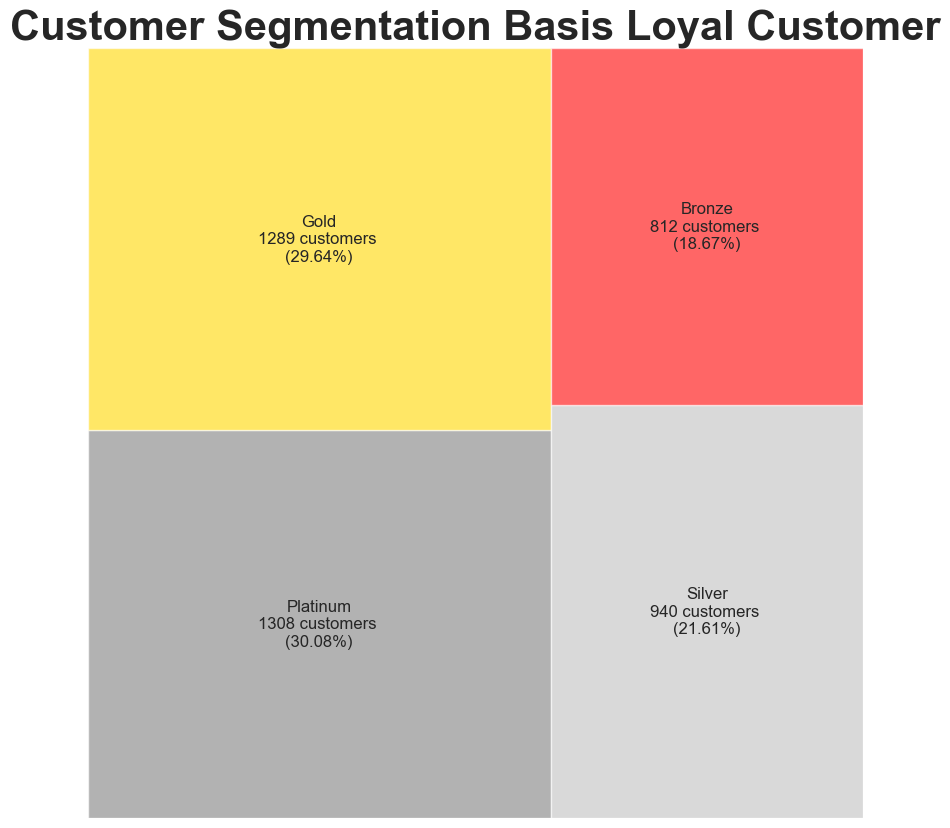

In [55]:
fig= plt.gcf()
ax = fig.add_subplot()
fig.set_size_inches(10,10)
color_dics={"Platinum":"grey","Gold":"gold","Silver":"silver","Bronze":"red"}
squarify.plot(sizes=new_datapoint["No_of_Customers"],color=color_dics.values(),
             label=["{}\n{:.0f} customers \n({}%)".format(*new_datapoint.iloc[i])
                    for i in range(0,len(new_datapoint))],alpha=0.6)
plt.title("Customer Segmentation Basis Loyal Customer",fontsize=30,fontweight="bold")
plt.axis("off")

# Building Machine Learing Algo - Kmeans

In [56]:
RFMScore1=RFMScore.iloc[:,1:4]
RFMScore1

,Recency,Frequency,Monetory
0,4,181,550416.0
1,77,27,257404.0
2,20,72,176613.0
3,18,16,41976.0
4,9,84,151822.0
...,...,...,...
4344,17,10,20480.0
4345,181,7,10774.0
4346,12,13,24962.0
4347,4,751,279720.0


# Feature Scaling

In [57]:
from sklearn.preprocessing import StandardScaler

sc= StandardScaler()

RFMScore1_sc = sc.fit_transform(RFMScore1)
RFMScore1_sc

array([[-0.64079551,  0.38301434,  0.37509732],
       [ 0.17351282, -0.28447368,  0.0326216 ],
       [-0.46231697, -0.08942848, -0.06180783],
       ...,
       [-0.55155624, -0.34515441, -0.23905922],
       [-0.64079551,  2.85358691,  0.05870479],
       [-0.1165148 , -0.10676583,  0.0320933 ]])

In [58]:
scaled_data = pd.DataFrame(RFMScore1_sc,index=RFMScore1.index,columns=RFMScore1.columns)

In [59]:
scaled_data

,Recency,Frequency,Monetory
0,-0.640796,0.383014,0.375097
1,0.173513,-0.284474,0.032622
2,-0.462317,-0.089428,-0.061808
3,-0.484627,-0.332151,-0.219173
4,-0.585021,-0.037416,-0.090784
...,...,...,...
4344,-0.495782,-0.358157,-0.244298
4345,1.333623,-0.371160,-0.255642
4346,-0.551556,-0.345154,-0.239059
4347,-0.640796,2.853587,0.058705


# Building K Means Cluster

In [60]:
from sklearn.cluster import KMeans

In [61]:
# wcss = []

# for i in range(2,15):
#     KM=KMeans(n_clusters=i,init ="k-means++",max_iter=1000,random_state=1)
#     KM.fit(scaled_data)
#     wcss.append(KM.inertia_)


In [62]:
wcss = []

for i in range(2,15):
    KM=KMeans(n_clusters=i,init ="k-means++",max_iter=1000,random_state=1)
    KM.fit(RFMScore1_sc)
    wcss.append(KM.inertia_)


In [63]:
wcss

[9014.85026124765,
 5556.2525958305805,
 4360.031655505537,
 3346.8742951224945,
 2481.0756115519916,
 1978.0159487281833,
 1708.4226746616318,
 1496.526030948622,
 1302.0654193907105,
 1135.2984482971247,
 985.8855468498052,
 864.6200520264738,
 768.3196400397618]

In [64]:
abc = [1,2,3,4,5,6,7,8,9,10,11,12,13]

In [65]:
# Elbow Method

<AxesSubplot:>

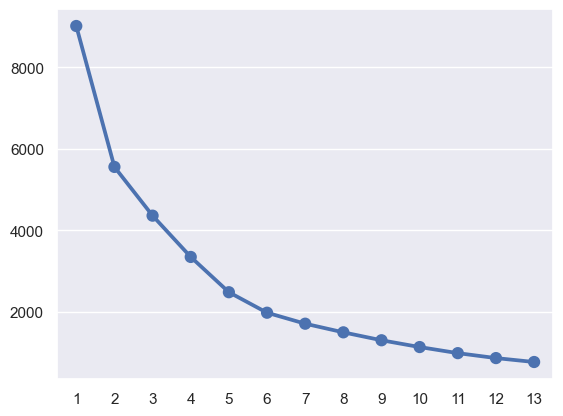

In [66]:
sns.pointplot(abc,wcss)

In [82]:
KM=KMeans(n_clusters=7,init ="k-means++",max_iter=1000,random_state=1)
y_kmeans = KM.fit_predict(scaled_data)
y_kmeans

array([1, 4, 1, ..., 1, 0, 1])

In [68]:
scaled_data["Cluster"]=KM.labels_

In [69]:
scaled_data

,Recency,Frequency,Monetory,Cluster
0,-0.640796,0.383014,0.375097,0
1,0.173513,-0.284474,0.032622,5
2,-0.462317,-0.089428,-0.061808,0
3,-0.484627,-0.332151,-0.219173,0
4,-0.585021,-0.037416,-0.090784,0
...,...,...,...,...
4344,-0.495782,-0.358157,-0.244298,0
4345,1.333623,-0.371160,-0.255642,5
4346,-0.551556,-0.345154,-0.239059,0
4347,-0.640796,2.853587,0.058705,6


In [70]:
scaled_data["Cluster"].value_counts()

0    2905
5     736
2     362
6     327
1      14
3       4
4       1
Name: Cluster, dtype: int64

In [83]:

from sklearn.metrics import silhouette_samples, silhouette_score

In [84]:
silhouette_score(scaled_data,scaled_data["Cluster"] , random_state=1)

0.8256779806267464

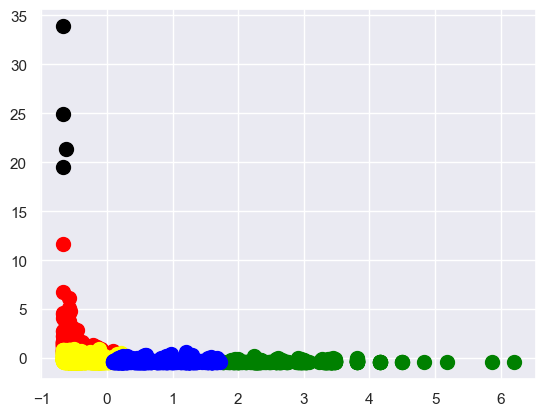

In [93]:
plt.scatter(RFMScore1_sc[y_kmeans==0,0], RFMScore1_sc[y_kmeans==0,1], s=100, c='red',label='Cluster1')
plt.scatter(RFMScore1_sc[y_kmeans==1,0], RFMScore1_sc[y_kmeans==1,1], s=100, c='yellow',label='Cluster2')
plt.scatter(RFMScore1_sc[y_kmeans==2,0], RFMScore1_sc[y_kmeans==2,1], s=100, c='green',label='Cluster3')
plt.scatter(RFMScore1_sc[y_kmeans==3,0], RFMScore1_sc[y_kmeans==3,1], s=100, c='black',label='Cluster4')
plt.scatter(RFMScore1_sc[y_kmeans==4,0], RFMScore1_sc[y_kmeans==4,1], s=100, c='blue',label='Cluster5')
plt.show()

In [74]:
import scipy.cluster.hierarchy as sch

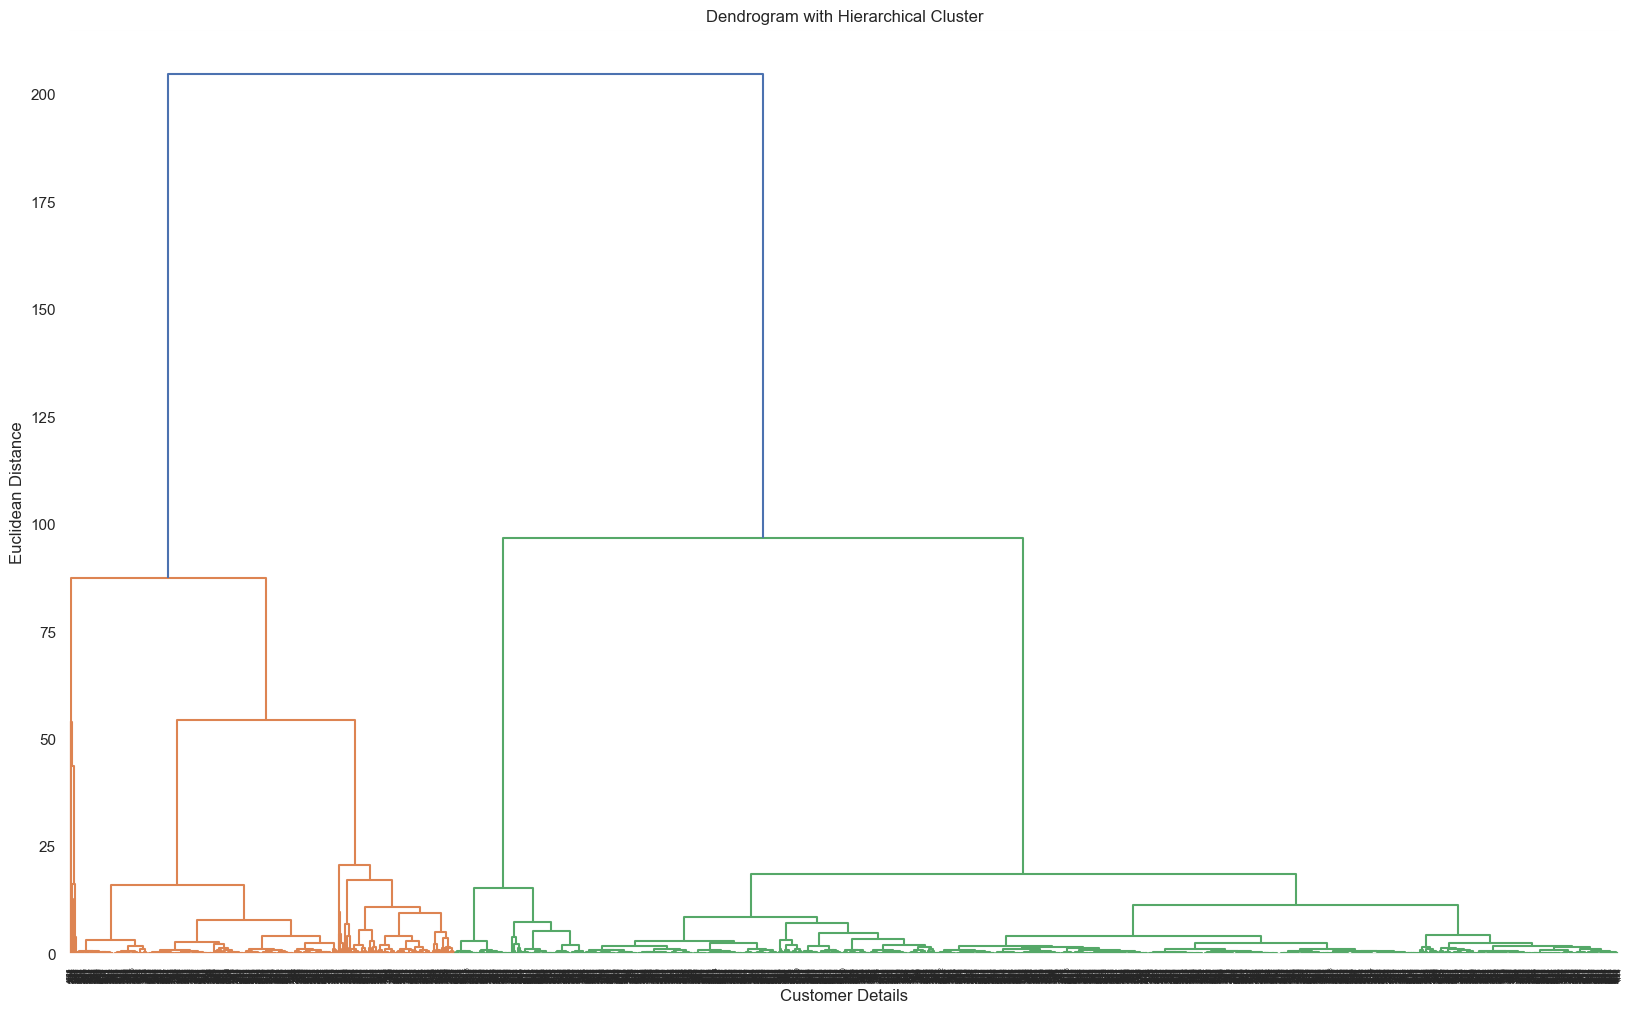

In [75]:
plt.figure(figsize=(20,12))
dendrogram = sch.dendrogram(sch.linkage(scaled_data, method='ward'))
plt.title("Dendrogram with Hierarchical Cluster")
plt.xlabel("Customer Details")
plt.ylabel("Euclidean Distance")
plt.show()

In [94]:
from sklearn.cluster import AgglomerativeClustering
hcluster = AgglomerativeClustering(n_clusters=7, affinity='euclidean',linkage='ward' )
hcluster

AgglomerativeClustering(n_clusters=7)

In [95]:
y_hcluster = hcluster.fit_predict(RFMScore1_sc)
y_hcluster

array([0, 2, 2, ..., 2, 0, 2], dtype=int64)

In [96]:
combined_cluster = pd.concat([RFMScore, pd.DataFrame(y_hcluster)], axis=1)
combined_cluster

,CustomerID,Recency,Frequency,Monetory,R,F,M,RFM,RFM_Score,Loyal_customers,0
0,2.0,4,181,550416.0,1,1,1,111,3,Platinum,0
1,3.0,77,27,257404.0,4,3,1,431,8,Gold,2
2,4.0,20,72,176613.0,3,2,2,322,7,Gold,2
3,5.0,18,16,41976.0,2,4,3,243,9,Silver,2
4,6.0,9,84,151822.0,1,2,2,122,5,Platinum,2
...,...,...,...,...,...,...,...,...,...,...,...
4344,4368.0,17,10,20480.0,2,4,4,244,10,Silver,2
4345,4369.0,181,7,10774.0,4,4,4,444,12,Bronze,5
4346,4370.0,12,13,24962.0,2,4,4,244,10,Silver,2
4347,4371.0,4,751,279720.0,1,1,1,111,3,Platinum,0


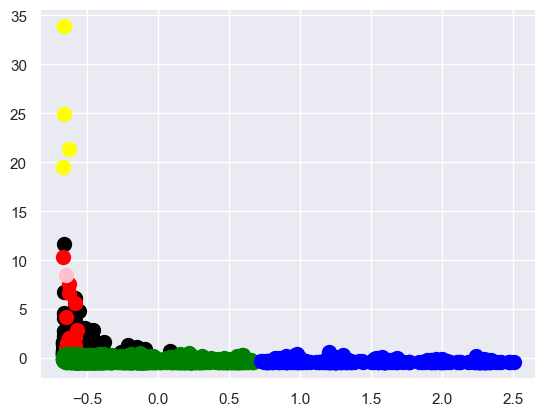

In [97]:
plt.scatter(RFMScore1_sc[y_hcluster==0,0], RFMScore1_sc[y_hcluster==0,1], s=100, c='black', label='H_Cluster1')
plt.scatter(RFMScore1_sc[y_hcluster==1,0], RFMScore1_sc[y_hcluster==1,1], s=100, c='red', label='H_Cluster2')
plt.scatter(RFMScore1_sc[y_hcluster==2,0], RFMScore1_sc[y_hcluster==2,1], s=100, c='green', label='H_Cluster3')
plt.scatter(RFMScore1_sc[y_hcluster==3,0], RFMScore1_sc[y_hcluster==3,1], s=100, c='yellow', label='H_Cluster4')
plt.scatter(RFMScore1_sc[y_hcluster==4,0], RFMScore1_sc[y_hcluster==4,1], s=100, c='pink', label='H_Cluster5')
plt.scatter(RFMScore1_sc[y_hcluster==5,0], RFMScore1_sc[y_hcluster==5,1], s=100, c='blue', label='H_Cluster5')

plt.show()